In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from PIL import Image
from subprocess import check_output
import requests
import urllib

Wordcloud in Positive


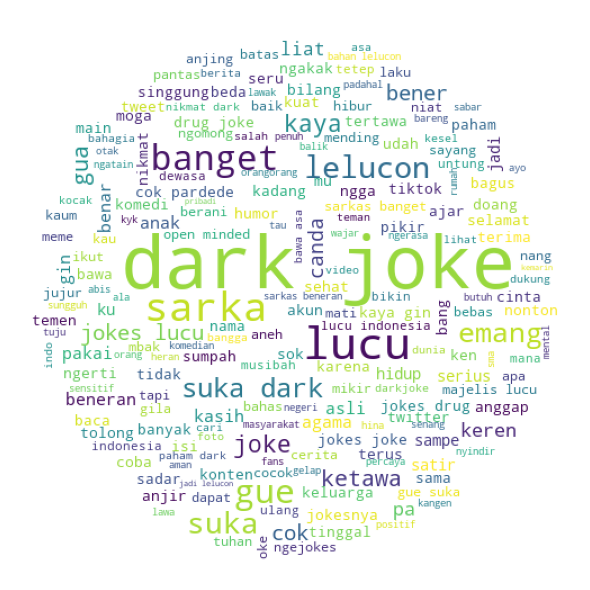

Wordcloud in Negative


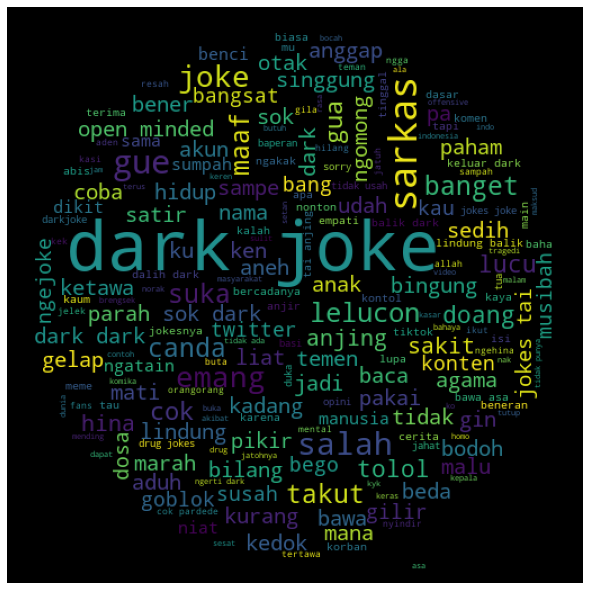

Wordcloud in Neutral


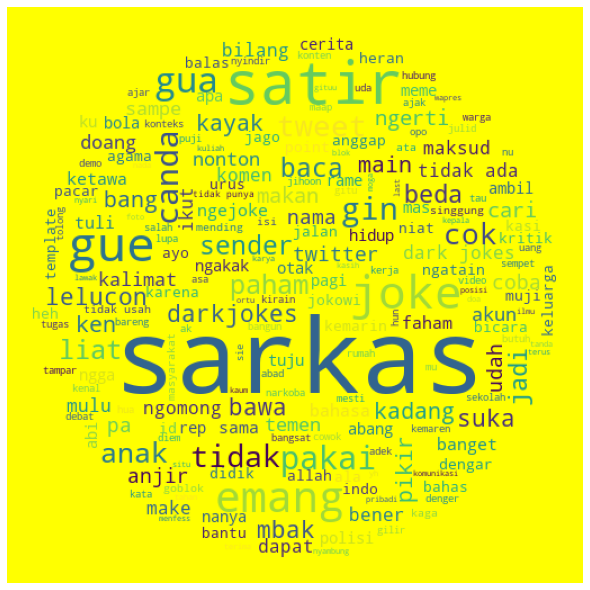

In [42]:
data = pd.read_csv('hasilpreproces_labeled.csv',sep=';')
data = data[['Text','Label']]

train, test = train_test_split(data)
train_pos = train[ train['Label'] == 'positive']
train_pos = train_pos['Text']
train_neg = train[ train['Label'] == 'negative']
train_neg = train_neg['Text']
train_neu = train[ train['Label'] == 'neutral']
train_neu = train_neu['Text']

mask = np.array(Image.open(requests.get('https://i7.pngguru.com/preview/213/735/579/circle-packing-in-a-circle-clip-art-circle.jpg', stream=True).raw))

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                             and not word.startswith('twitch')
                             and not word.startswith('aha')
                             and not word.startswith('ha')
                             and not word.startswith('asd')
                             and not word.startswith('ga')
                             and not word.startswith('ye')
                             and not word.startswith('youtube')
                             and word != 'WWW'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=512,
                      height=512, mask=mask
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
print("Wordcloud in Positive")
wordcloud_draw(train_pos,'white')

print("Wordcloud in Negative")
wordcloud_draw(train_neg)

print("Wordcloud in Neutral")
wordcloud_draw(train_neu,'yellow')

Index(['Text', 'Label'], dtype='object')